<a href="https://colab.research.google.com/github/zahra370/DL_assignments/blob/main/zahra_khan_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
#  importing Libraries
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import uniform_filter

Images Shape: (50000, 32, 32, 3)
Labels Shape: (50000, 1)
Index Shape: (50000,)
Filtered Images Shape: (5000, 32, 32, 3)
labels4 (5000, 1)
Index Shape: (50000,)
Filtered Images Shape: (5000, 32, 32, 3)


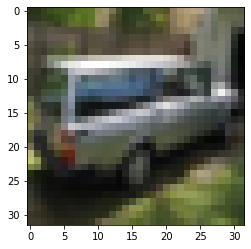

labels6 (5000, 1)


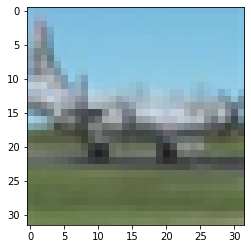

In [36]:
######## DEEP LEARNING ASSIGNMENT 01 ##########

from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import numpy as np

# importing CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels)= datasets.cifar10.load_data()

print('Images Shape: {}'.format(train_images.shape))
print('Labels Shape: {}'.format(train_labels.shape))

# extraction class 5 deer 
idx = (train_labels == 0).reshape(train_images.shape[0])
print('Index Shape: {}'.format(idx.shape))
filtered_images4 = train_images[idx]
print('Filtered Images Shape: {}'.format(filtered_images4.shape))
plt.imshow(filtered_images4[150])
# extracting labels for class4
labels_c4 = train_labels[idx]
print('labels4',labels_c4.shape)


# extracting class 6 frog

idx = (train_labels == 1).reshape(train_images.shape[0])
print('Index Shape: {}'.format(idx.shape))
filtered_images6 = train_images[idx]
print('Filtered Images Shape: {}'.format(filtered_images6.shape))
plt.imshow(filtered_images6[200])
plt.show()
plt.imshow(filtered_images4[201])
# extracting labels for class6

labels_c6 = train_labels[idx]
print('labels6',labels_c6.shape)


In [37]:

# extracting first 20 images from class4

class4_img = filtered_images4[:20]
print(class4_img.shape)
class6_img = filtered_images6[:20]
print(class6_img.shape)
c4_labels = labels_c4[:20]
print(c4_labels.shape)
c6_labels = labels_c6[:20]
print(c6_labels.shape)

(20, 32, 32, 3)
(20, 32, 32, 3)
(20, 1)
(20, 1)


In [38]:
# splitting data into train and test set

X_train_c4 = class4_img[:12]
X_train_c6 = class6_img[:12]
X_TRAIN = np.concatenate((X_train_c4, X_train_c6))
print('xtrain',X_TRAIN.shape)

X_val_c4 = class4_img[12:16]
X_val_c6 = class6_img[12:16]
X_VAL = np.concatenate((X_val_c4, X_val_c6))
print('xval',X_VAL.shape)

X_test_c4 = class4_img[16:]
X_test_c6 = class6_img[16:]
X_TEST = np.concatenate((X_test_c4, X_test_c6))
print('xtest',X_TEST.shape)

Y_train_c4 = c4_labels[:12]
Y_train_c6 = c6_labels[:12]
Y_TRAIN = np.concatenate((Y_train_c4, Y_train_c6))
print('ytrain',Y_TRAIN.shape)

Y_val_c4 = c4_labels[12:16]
Y_val_c6 = c6_labels[12:16]
Y_VAL = np.concatenate((Y_val_c4, Y_val_c6))
print('yval',Y_VAL.shape)

Y_test_c4 = c4_labels[16:]
Y_test_c6 = c6_labels[16:]
Y_TEST = np.concatenate((Y_test_c4, Y_test_c6))
print('ytest',Y_TEST.shape)

xtrain (24, 32, 32, 3)
xval (8, 32, 32, 3)
xtest (8, 32, 32, 3)
ytrain (24, 1)
yval (8, 1)
ytest (8, 1)


In [39]:
from __future__ import print_function

import matplotlib
import numpy as np
from scipy.ndimage import uniform_filter


def extract_features(imgs, feature_fns, verbose=False):

  num_images = imgs.shape[0]
  if num_images == 0:
    return np.array([])

  # Use the first image to determine feature dimensions
  feature_dims = []
  first_image_features = []
  for feature_fn in feature_fns:
    feats = feature_fn(imgs[0].squeeze())
    assert len(feats.shape) == 1, 'Feature functions must be one-dimensional'
    feature_dims.append(feats.size)
    first_image_features.append(feats)

  # Now that we know the dimensions of the features, we can allocate a single
  # big array to store all features as columns.
  total_feature_dim = sum(feature_dims)
  imgs_features = np.zeros((num_images, total_feature_dim))
  imgs_features[0] = np.hstack(first_image_features).T

  # Extract features for the rest of the images.
  for i in range(1, num_images):
    idx = 0
    for feature_fn, feature_dim in zip(feature_fns, feature_dims):
      next_idx = idx + feature_dim
      imgs_features[i, idx:next_idx] = feature_fn(imgs[i].squeeze())
      idx = next_idx
    if verbose and i % 1000 == 0:
      print('Done extracting features for %d / %d images' % (i, num_images))

  return imgs_features


def rgb2gray(rgb):

  return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])


def hog_feature(im):

  
  # convert rgb to grayscale if needed
  if im.ndim == 3:
    image = rgb2gray(im)
  else:
    image = np.at_least_2d(im)

  sx, sy = image.shape # image size
  orientations = 9 # number of gradient bins
  cx, cy = (8, 8) # pixels per cell

  gx = np.zeros(image.shape)
  gy = np.zeros(image.shape)
  gx[:, :-1] = np.diff(image, n=1, axis=1) # compute gradient on x-direction
  gy[:-1, :] = np.diff(image, n=1, axis=0) # compute gradient on y-direction
  grad_mag = np.sqrt(gx ** 2 + gy ** 2) # gradient magnitude
  grad_ori = np.arctan2(gy, (gx + 1e-15)) * (180 / np.pi) + 90 # gradient orientation

  n_cellsx = int(np.floor(sx / cx))  # number of cells in x
  n_cellsy = int(np.floor(sy / cy))  # number of cells in y
  # compute orientations integral images
  orientation_histogram = np.zeros((n_cellsx, n_cellsy, orientations))
  for i in range(orientations):
    # create new integral image for this orientation
    # isolate orientations in this range
    temp_ori = np.where(grad_ori < 180 / orientations * (i + 1),
                        grad_ori, 0)
    temp_ori = np.where(grad_ori >= 180 / orientations * i,
                        temp_ori, 0)
    # select magnitudes for those orientations
    cond2 = temp_ori > 0
    temp_mag = np.where(cond2, grad_mag, 0)
    orientation_histogram[:,:,i] = uniform_filter(temp_mag, size=(cx, cy))[int(cx/2)::cx, int(cy/2)::cy].T
  
  return orientation_histogram.ravel()


def color_histogram_hsv(im, nbin=10, xmin=0, xmax=255, normalized=True):

  ndim = im.ndim
  bins = np.linspace(xmin, xmax, nbin+1)
  hsv = matplotlib.colors.rgb_to_hsv(im/xmax) * xmax
  imhist, bin_edges = np.histogram(hsv[:,:,0], bins=bins, density=normalized)
  imhist = imhist * np.diff(bin_edges)

  # return histogram
  return imhist


pass

In [40]:
num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_TRAIN, feature_fns, verbose=True)
X_val_feats = extract_features(X_VAL, feature_fns)
X_test_feats = extract_features(X_TEST, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

In [41]:

# Reshape the training and test examples 
train_x_flatten = X_train_feats.reshape(X_TRAIN.shape[0], -1).T  # The "-1" makes reshape flatten the remaining dimensions
val_x_flatten = X_val_feats.reshape(X_VAL.shape[0], -1).T
test_x_flatten = X_test_feats.reshape(X_TEST.shape[0], -1).T


# Standardize data to have feature values between 0 and 1.
x_train = train_x_flatten/255.
x_val = test_x_flatten/255.
x_test = test_x_flatten/255.

print('xtrain',x_train.shape)
print('xval',x_val.shape)
print('xtest',x_test.shape)


y_train = Y_TRAIN.reshape(-1,)
y_val = Y_VAL.reshape(-1,)
y_test = Y_TEST.reshape(-1,)

# new_y_train = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,]
# n_z = np.zeros(12)
# n_o = np.ones(12)
# new_y_train = n_o.append(n_z)
print('ytrain',y_train.shape)
print('yval',y_val.shape)
print('ytest',y_test.shape)


xtrain (154, 24)
xval (154, 8)
xtest (154, 8)
ytrain (24,)
yval (8,)
ytest (8,)


In [42]:
def initialize_parameters_deep(layer_dims):

    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network


    for l in range(1, L):

        parameters['w' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*0.01  #* np.sqrt(1 / layer_dims[l])
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
        
        
    return parameters

def tanh(x):
    return np.tanh(x)
def d_tanh(x):
    return (1 - np.power(np.tanh(x), 2))

def softmax(x):
    # """ applies softmax to an input x"""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

def leaky_Relu(x):
  r = np.maximum(0.01*x, x)
  return r


def  leaky_Relu_Derv(x):
  alpha = 0.01
  if np.where(x<0):
    return alpha
  else :
    return x

  # return scores
  # # 0.01 if x < 0 else 1

def forward_prop(x, parameters):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    w3 = parameters['w3']
    b3 = parameters['b3']
    w4 = parameters['w4']
    b4 = parameters['b4']
    
    z1 = np.dot(w1, x) + b1
    a1 = leaky_Relu(z1)

    z2 = np.dot(w2, a1) + b2
    a2 = leaky_Relu(z2)

    z3 = np.dot(w3, a2) + b3
    a3 = leaky_Relu(z3)

    
    z4 = np.dot(w4, a3) + b4
    a4 = sigmoid(z4)
    
    forward_cache = {
        "z1" : z1,
        "a1" : a1,
        "z2" : z2,
        "a2" : a2,
        "z3" : z3,
        "a3" : a3,
        "z4" : z4,
        "a4" : a4
    }
    
    return a4, forward_cache


def cost_fun(Y,A,params,reg):
  m = Y.shape[0]
  w1 = np.sum(np.square(params["w1"]))
  w2 = np.sum(np.square(params["w2"]))
  w3 = np.sum(np.square(params["w3"]))
  w4 = np.sum(np.square(params["w4"]))
  S = w1 + w2 + w3 + w4

  logprobs = np.multiply(-np.log(A), Y) + np.multiply(-np.log(1 - A), 1 - Y)
  j = (1. / m ) * np.sum(logprobs)
  cost = j + (reg / (2 * m)) * S

  # cost = -np.sum(Y*np.log(A))
  # cost = cost + (reg / (2 )) * S
  # cost = (1/m)*cost
  cost = np.squeeze(cost)
  # print(cost)
  return cost
def backward_prop(parameters, cache,x,y):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    w3 = parameters['w3']
    b3 = parameters['b3']
    w4 = parameters['w4']
    b4 = parameters['b4']

    a1 = cache['a1']
    a2 = cache['a2']
    a3 = cache['a3']
    a4 = cache['a4']

    m = x.shape[1]
    
    dz4 = (a4 - y)
    dw4 = (1/m)*np.dot(dz4, a3.T)
    db4 = (1/m)*np.sum(dz4, axis = 1, keepdims = True)
    
    dz3 = (1/m)*np.dot(w4.T, dz4)*leaky_Relu_Derv(a3)
    dw3 = (1/m)*np.dot(dz3, a2.T)
    db3 = (1/m)*np.sum(dz3, axis = 1, keepdims = True)

    dz2 = (1/m)*np.dot(w3.T, dz3)*leaky_Relu_Derv(a2)
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True)

    dz1 = (1/m)*np.dot(w2.T, dz2)*leaky_Relu_Derv(a1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)

    dw4 += reg  * w4
    dw3 += reg  * w3    
    dw2 += reg * w2
    dw1 += reg* w1
    
    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2,
        "dw3" : dw3,
        "db3" : db3,
        "dw4" : dw4,
        "db4" : db4

    }
    
    return gradients

    
def update_parameters(parameters, gradients, learning_rate):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    w3 = parameters['w3']
    b3 = parameters['b3']
    w4 = parameters['w4']
    b4 = parameters['b4']
    
    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']
    dw3 = gradients['dw3']
    db3 = gradients['db3']
    dw4 = gradients['dw4']
    db4 = gradients['db4']
    
    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2
    w3 = w3 - learning_rate*dw3
    b3 = b3 - learning_rate*db3
    w4 = w4 - learning_rate*dw4
    b4 = b4 - learning_rate*db4

    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2,
        "w3" : w3,
        "b3" : b3,
        "w4" : w4,
        "b4" : b4
    }
    
    return parameters




#######################################################
#                 Neural Network                      #
#######################################################

def model(layers_dims, learning_rate, iterations,x,y,reg):
    
    
    cost_list = []
    
    parameters = initialize_parameters_deep(layers_dims)
    
    for i in range(iterations):
        
        AL ,f_cache = forward_prop(x, parameters)
        
        cost = cost_fun(y, AL,parameters,reg)
        
        grads = backward_prop(parameters,f_cache,x, y)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("Cost after", i, "iterations is :", cost)
        
    return parameters, cost_list




In [43]:
# # This will take some minutes
layers_dims = [154, 10, 10, 5,1] #  4-layer model

parms = initialize_parameters_deep(layers_dims)

AL ,f_cache = forward_prop(x_train, parms)
print('shape of AL',AL.shape)

reg = 0.01
cost = cost_fun(y_train, AL,parms,reg)
# print(cost)

grads = backward_prop(parms,f_cache,x_train, y_train)

parameters = update_parameters(parms,grads,learning_rate = 0.01)


learning_rate = 2
reg = 0.01
iterations = 1000
weights, Cost_list = model(layers_dims, learning_rate, iterations,x_train,y_train,reg)
weights, Cost_list2 = model(layers_dims, learning_rate, iterations,x_val,y_val,reg)
weights, Cost_list3 = model(layers_dims, learning_rate, iterations,x_test,y_test,reg)

shape of AL (1, 24)
Cost after 0 iterations is : 0.6931839342004941
Cost after 100 iterations is : 0.6931478269781074
Cost after 200 iterations is : 0.6931471919291126
Cost after 300 iterations is : 0.6931471807599054
Cost after 400 iterations is : 0.693147180563462
Cost after 500 iterations is : 0.693147180560007
Cost after 600 iterations is : 0.6931471805599463
Cost after 700 iterations is : 0.6931471805599452
Cost after 800 iterations is : 0.6931471805599452
Cost after 900 iterations is : 0.6931471805599452
Cost after 0 iterations is : 0.69325744083641
Cost after 100 iterations is : 0.693149119814587
Cost after 200 iterations is : 0.6931472146674533
Cost after 300 iterations is : 0.6931471811598263
Cost after 400 iterations is : 0.693147180570496
Cost after 500 iterations is : 0.6931471805601308
Cost after 600 iterations is : 0.6931471805599485
Cost after 700 iterations is : 0.6931471805599454
Cost after 800 iterations is : 0.6931471805599453
Cost after 900 iterations is : 0.6931471

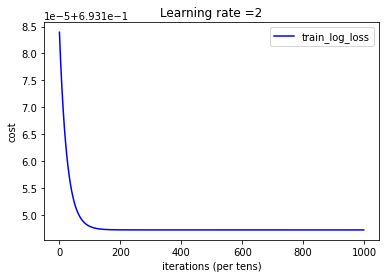

In [44]:

plt.plot(np.squeeze(Cost_list),color='b', label='train_log_loss')
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(2))
plt.legend()
plt.show()

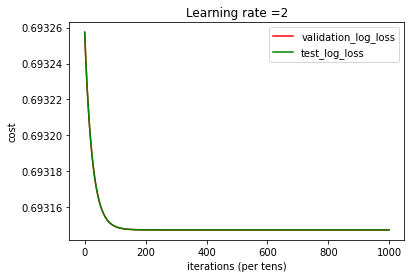

In [45]:
plt.plot(np.squeeze(Cost_list2),color='r', label='validation_log_loss')

plt.plot(np.squeeze(Cost_list3),color='g', label='test_log_loss')
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(2))
plt.legend()
plt.show()

In [46]:
# AL, cache = forward_prop(x_train, weights)
# print(AL)
# qa = AL.reshape(-1,)
# print(y_train)
# print(qa)

In [47]:
def pred(X, y, theta):
    m = X.shape[1]
    # p = np.zeros((1, m))
    p = []

    # Forward propagation
    l, caches = forward_prop(X, theta)
    A = l.reshape(-1,)

    # convert probas to 0/1 predictions
    for i in range(0,len(A)):
        if A[ i] >=  0.5:    # 0.49881081  0.1--76 f1 0.2 - f1 83 test 0.5
            p.append(0)
        else:
            p.append(1)
    print("Accuracy: " + str(np.sum((p == y) / m)))

    return p
pred_train = pred(x_train, y_train, weights)


Accuracy: 0.5


In [48]:
pred_val = pred(x_val, y_val, weights)
pred_val = pred(x_test, y_test, weights)

Accuracy: 0.5
Accuracy: 0.5


In [54]:
# hyper parameter tuning


best_net = None # store the best model into this 
best_val = -1
best_stats = []
def generate_random_hyperparams(lr_min, lr_max, reg_min, reg_max):
    lr = 10**np.random.uniform(lr_min,lr_max)
    reg = 10**np.random.uniform(reg_min,reg_max)
    # hidden = np.random.randint(h_min, h_max)
    return lr, reg

# get random hyperparameters given arrays of potential values
def random_search_hyperparams(lr_values, reg_values):
    lr = lr_values[np.random.randint(0,len(lr_values))]
    reg = reg_values[np.random.randint(0,len(reg_values))]
    # hidden = h_values[np.random.randint(0,len(h_values))]
    return lr, reg

input_size = 32 * 32 * 3
num_classes = 10

# Set a seed for results reproduction
np.random.seed(0)
iterations = 1000
for i in range(20):

    lr, reg = random_search_hyperparams([0.01], [0.05, 0.1, 0.15])
    w, Cost = model(layers_dims, lr, iterations,x_train,y_train,reg)
    pred_train = pred(x_train, y_train, w)





Cost after 0 iterations is : 0.6933309481042623
Cost after 100 iterations is : 0.6933134561374626
Cost after 200 iterations is : 0.6932976291498234
Cost after 300 iterations is : 0.693283308659477
Cost after 400 iterations is : 0.6932703512697727
Cost after 500 iterations is : 0.6932586272333704
Cost after 600 iterations is : 0.6932480191530159
Cost after 700 iterations is : 0.6932384208059843
Cost after 800 iterations is : 0.6932297360804225
Cost after 900 iterations is : 0.6932218780129352
Accuracy: 0.45833333333333326
Cost after 0 iterations is : 0.6936984828636829
Cost after 100 iterations is : 0.6935555033444105
Cost after 200 iterations is : 0.6934496053795073
Cost after 300 iterations is : 0.6933711719127565
Cost after 400 iterations is : 0.6933130800610879
Cost after 500 iterations is : 0.6932700542528947
Cost after 600 iterations is : 0.6932381871296346
Cost after 700 iterations is : 0.6932145847012686
Cost after 800 iterations is : 0.6931971035303245
Cost after 900 iterations

In [56]:
#  since validation accuracy comes out 50% maximum for all values of lr and reg 
print(lr,reg)

pred_val = pred(x_val, y_val, weights)
pred_val = pred(x_test, y_test, weights)

0.01 0.15
Accuracy: 0.5
Accuracy: 0.5
